In [19]:
# 필요 라이브러리 로드
from matplotlib import font_manager, rc
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import platform
if platform.system() == 'Windows':
# 윈도우인 경우 맑은 고딕 폰트 이용
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf"
                                           ).get_name()
    rc('font', family=font_name)
else:    
# Mac 인 경우
    rc('font', family='AppleGothic')

#그래프에서 마이너스 기호가 표시되게 하는 설정입니다.
plt.rcParams['axes.unicode_minus'] == False

False

In [20]:

path1 = 'processing_data/blackout.csv'
# blackout_df = pd.read_excel(path1)
blackout_df = pd.read_csv(path1, encoding='cp949')


In [21]:
blackout_df.drop(columns=['Unnamed: 0'], inplace= True)

In [22]:
blackout_df

,정전피해_지역,피해_가구수,시작시간,종료시간
0,강원도 삼척시,1,2022.03.05 00:30,2022.03.05 01:23
1,강원도 삼척시,14,2022.03.04 17:43,2022.03.05 01:21
2,강원도 삼척시,10,2022.03.04 17:43,2022.03.04 18:27
3,인천광역시 강화군,2000,2022.02.08 16:26,2022.02.08 11:31
4,인천광역시 부평구,2000,2022.02.04 16:30,2022.02.04 18:45
...,...,...,...,...
4111,강원도 속초시,1300,2012.06.28 14:40,2012.06.28 14:58
4112,강원도 고성군,1200,2012.06.28 14:30,2012.06.28 14:59
4113,경기도 파주시,376,2012.06.14 11:20,2012.06.14 11:50
4114,경기도 파주시,2692,2012.06.14 11:20,2012.06.14 11:50


In [23]:
blackout_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4116 entries, 0 to 4115
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   정전피해_지역  4116 non-null   object
 1   피해_가구수   4116 non-null   int64 
 2   시작시간     4116 non-null   object
 3   종료시간     4116 non-null   object
dtypes: int64(1), object(3)
memory usage: 128.8+ KB


In [24]:
blackout_df['시작시간'] = pd.to_datetime(blackout_df['시작시간'])
blackout_df['종료시간'] = pd.to_datetime(blackout_df['종료시간'])

In [25]:
blackout_df.sort_values('시작시간', inplace=True)

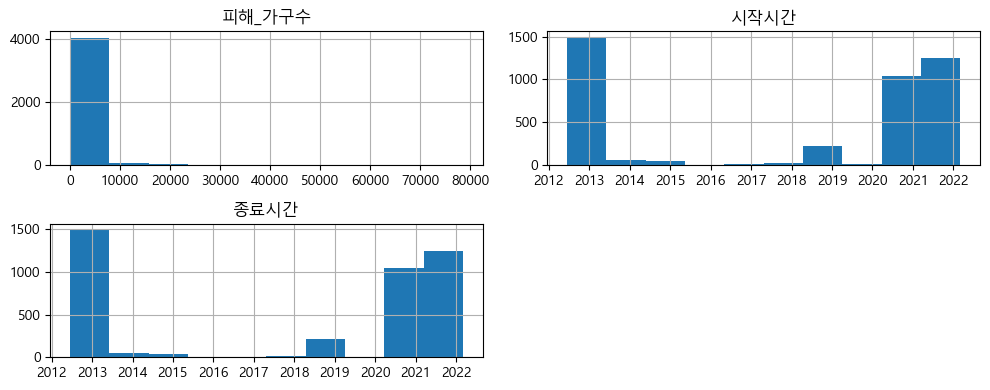

In [39]:
blackout_df.hist(figsize=(10,4))
plt.tight_layout() # 그래프 간격 설정
plt.show()

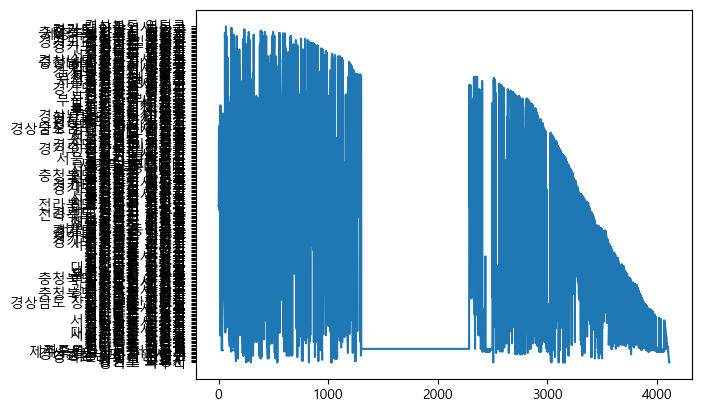

In [40]:
plt.subplot(1,2,2)
plt.plot(blackout_df.groupby('year')['OPS'].median())
plt.title('연도별 OPS 중앙값', size = 20)
plt.show()

In [36]:
blackout_df.columns

Index(['정전피해_지역', '피해_가구수', '시작시간', '종료시간'], dtype='object')

In [ ]:
for n in range(0,len(3)):
    sample_size = 10**(n+1)
    sample = np.random.normal(loc=0.0, scale=1.0, size=sample_size)
    blackout_df['정전피해_지역'].hist(sample)
    axs[n].set_title('n={}'.format(sample_size))

In [ ]:
path2 = 'data/광주광역시_용도별_월사용량/계약종별 전력사용량 월별_2021.07~12.xls'
path3 = 'data/광주광역시_용도별_월사용량/계약종별 전력사용량 월별_2022.01~06.xls'
path4 = 'data/광주광역시_용도별_월사용량/계약종별 전력사용량 월별_2022.07~12.xls'
power_jobtype_2021_07 = pd.read_excel(path2)
power_jobtype_2022_01 = pd.read_excel(path3)
power_jobtype_2022_07 = pd.read_excel(path4)


In [11]:
power_jobtype_2021_01.head(12)

,계약종별 전력사용량 월별( 20230321 현재 ),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,"시도 : 광주광역시, 시군구 : 전체(시 / 군 / 구)",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,기간 : 2021년 01 월 ~ 2021년 06월,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,년월,시구,시군구,계약구분,고객호수(호),사용량(kWh),전기요금(원),평균판매단가(원/kWh)
3,202101,광주광역시,전체(시 / 군 / 구),주택용,"386,291","200,924,825","22,352,496,686",111.2
4,202101,광주광역시,전체(시 / 군 / 구),일반용,"94,050","278,464,922","36,025,290,206",129.4
5,202101,광주광역시,전체(시 / 군 / 구),교육용,630,"32,355,494","3,074,821,310",95.0
6,202101,광주광역시,전체(시 / 군 / 구),산업용,"6,402","267,717,054","32,272,757,689",120.5
7,202101,광주광역시,전체(시 / 군 / 구),농사용,"12,017","11,148,705","494,595,520",44.4
8,202101,광주광역시,전체(시 / 군 / 구),가로등,"47,953","7,885,102","815,183,230",103.4
9,202101,광주광역시,전체(시 / 군 / 구),심 야,"5,704","13,368,315","960,768,979",71.9


In [12]:
power_jobtype_2021_01.drop(labels=range(0, 3),axis=0,inplace=True)
power_jobtype_2021_07.drop(labels=range(0, 3),axis=0, inplace=True)
power_jobtype_2022_01.drop(labels=range(0, 3),axis=0, inplace=True)
power_jobtype_2022_07.drop(labels=range(0, 3),axis=0, inplace=True)

In [13]:
power_jobtype_2021_01 = power_jobtype_2021_01.iloc[:42]
power_jobtype_2021_07 = power_jobtype_2021_07.iloc[:42]
power_jobtype_2022_01 = power_jobtype_2022_01.iloc[:42]
power_jobtype_2022_07 = power_jobtype_2022_07.iloc[:42]

In [18]:
power_jobtype_2022_07

,계약종별 전력사용량 월별( 20230321 현재 ),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
3,202207,광주광역시,전체(시 / 군 / 구),주택용,"390,156","215,998,337","26,436,749,057",122.4
4,202207,광주광역시,전체(시 / 군 / 구),일반용,"97,555","295,199,044","45,473,210,432",154.0
5,202207,광주광역시,전체(시 / 군 / 구),교육용,630,"29,711,525","3,636,090,870",122.4
6,202207,광주광역시,전체(시 / 군 / 구),산업용,"6,542","282,528,446","39,470,649,953",139.7
7,202207,광주광역시,전체(시 / 군 / 구),농사용,"12,586","6,442,917","408,448,525",63.4
8,202207,광주광역시,전체(시 / 군 / 구),가로등,"48,997","5,393,415","730,693,453",135.5
9,202207,광주광역시,전체(시 / 군 / 구),심 야,"5,263","3,524,894","285,701,785",81.1
10,202208,광주광역시,전체(시 / 군 / 구),주택용,"390,098","256,459,950","31,796,507,010",124.0
11,202208,광주광역시,전체(시 / 군 / 구),일반용,"97,912","317,419,045","48,205,742,677",151.9
12,202208,광주광역시,전체(시 / 군 / 구),교육용,629,"25,994,225","3,379,535,444",130.0


In [22]:
power_entire = pd.concat([power_jobtype_2021_01,
                                    power_jobtype_2021_07,
                                    power_jobtype_2022_01,
                                    power_jobtype_2022_07])

In [23]:
power_entire.reset_index(drop=True, inplace=True)

In [24]:
power_entire.drop(columns='Unnamed: 2', inplace=True)

In [26]:
power_entire

,계약종별 전력사용량 월별( 20230321 현재 ),Unnamed: 1,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,202101,광주광역시,주택용,"386,291","200,924,825","22,352,496,686",111.2
1,202101,광주광역시,일반용,"94,050","278,464,922","36,025,290,206",129.4
2,202101,광주광역시,교육용,630,"32,355,494","3,074,821,310",95.0
3,202101,광주광역시,산업용,"6,402","267,717,054","32,272,757,689",120.5
4,202101,광주광역시,농사용,"12,017","11,148,705","494,595,520",44.4
...,...,...,...,...,...,...,...
163,202212,광주광역시,교육용,629,"31,159,967","3,821,817,926",122.7
164,202212,광주광역시,산업용,"6,550","256,259,483","38,670,493,980",150.9
165,202212,광주광역시,농사용,"12,753","8,624,110","597,859,534",69.3
166,202212,광주광역시,가로등,"49,181","7,316,937","919,003,330",125.6


In [31]:
power_entire.rename(columns={'계약종별 전력사용량 월별( 20230321 현재 )':'년도',
                                                       'Unnamed: 1': "시도",
                                                       'Unnamed: 3': "계약구분",
                                                       'Unnamed: 4': "고객수",
                                                       'Unnamed: 5': "사용량(kWh)",
                                                       'Unnamed: 6': "전기요금(원)",
                                                       'Unnamed: 7': "평균판매단가(원/kWh)"}, inplace=True)

In [32]:
power_entire.head(3)

,년도,시도,계약구분,고객수,사용량(kWh),전기요금(원),평균판매단가(원/kWh)
0,202101,광주광역시,주택용,"386,291","200,924,825","22,352,496,686",111.2
1,202101,광주광역시,일반용,"94,050","278,464,922","36,025,290,206",129.4
2,202101,광주광역시,교육용,630,"32,355,494","3,074,821,310",95.0


In [33]:
power_entire.sort_values('년도',inplace=True)

In [34]:
power_entire.to_csv('광주_업종별_전력사용량.csv', encoding='cp949')